# 第6章: 機械学習(50〜54)
本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

# 50.データの入手・整形
*News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．*

1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
3. 抽出された事例をランダムに並び替える．
4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

*学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．*

【参考】
scikit-learnでデータを訓練用とテスト用に分割するtrain_test_split
https://note.nkmk.me/python-sklearn-train-test-split/

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

#    2. 事例抽出
# readme.txtに従いヘッダーを追加する
# read_csvの引数にnames＝['...', ...]
news_corpora = pd.read_csv('NewsAggregatorDataset/newsCorpora.csv', delimiter='\t', names = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

# 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する
df = news_corpora[(news_corpora['PUBLISHER']=='Reuters') | (news_corpora['PUBLISHER']=='Huffington Post') | (news_corpora['PUBLISHER']=='Businessweek') | \
      (news_corpora['PUBLISHER']=='Contactmusic.com') | (news_corpora['PUBLISHER']=='Daily Mail')]

#df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

#    3. 並び替え
df = df.sample(frac=1) # すべてをサンプリング

#    4. 保存
train_df, valid_test_df = train_test_split(df, test_size=0.2) # 8:2
valid_df, test_df = train_test_split(valid_test_df, test_size=0.5) # 8:1:1
train_df.to_csv('./NewsAggregatorDataset/train.txt', columns = ['CATEGORY','TITLE'], sep='\t',header=False, index=False)
valid_df.to_csv('./NewsAggregatorDataset/valid.txt', columns = ['CATEGORY','TITLE'], sep='\t',header=False, index=False)
test_df.to_csv('./NewsAggregatorDataset/test.txt', columns = ['CATEGORY','TITLE'], sep='\t',header=False, index=False)

#  事例数の確認
df['CATEGORY'].value_counts()

b    5627
e    5279
t    1524
m     910
Name: CATEGORY, dtype: int64

In [2]:
df

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
320193,320653,CORRECTED-UPDATE 2-Chicago selected for George...,http://in.reuters.com/article/2014/06/25/usa-l...,Reuters,e,dJ2RGmKzlpO1pdMag4rrtPMa7H5XM,in.reuters.com,1403801277200
388716,389176,Nominating Charlie Sheen For King Of The Drunk...,http://www.contactmusic.com/article/charlie-sh...,Contactmusic.com,e,dafAzhctSWlLL9MxlA9MoqeG9ZqqM,www.contactmusic.com,1405644457225
91400,91476,American Raises Miles Needed for Free Travel o...,http://www.businessweek.com/news/2014-04-08/am...,Businessweek,b,dvFJSn18_821CHMM_pccdlhH_GpmM,www.businessweek.com,1396988219289
352715,353175,Second largest American Apparel shareholder se...,http://in.reuters.com/article/2014/07/03/us-re...,Reuters,b,damxbLVSukS_0QMlsJC1pJndyIx0M,in.reuters.com,1404449407746
270258,270704,Has Angelina Jolie Actually Been In Any Good M...,http://www.huffingtonpost.com/2014/06/03/angel...,Huffington Post,e,d7SbUKanRaD34YMwE64lo09d_qCnM,www.huffingtonpost.com,1401828914030
...,...,...,...,...,...,...,...,...
280373,280833,Mila Kunis Sends Message To All Future Fathers...,http://www.contactmusic.com/article/mila-kunis...,Contactmusic.com,e,dQEXtwpswiNW-4MJkBLcTFNZCQ42M,www.contactmusic.com,1402685939490
187995,188331,"You've Heard of Alibaba, but How Do You Use It?",http://www.businessweek.com/news/2014-05-07/yo...,Businessweek,b,dmiKSRWtLS-0oQMZgRdMabvm20GNM,www.businessweek.com,1399496054764
420584,421103,The Mystery Of Tony's Fate In 'The Sopranos' H...,http://www.huffingtonpost.com/2014/08/27/tony-...,Huffington Post,e,dBONje1PDQr12ZMfqA4sYTplZpX4M,www.huffingtonpost.com,1409218110023
184694,185030,Target Seen Pursuing First Outside CEO After S...,http://www.businessweek.com/news/2014-05-06/ta...,Businessweek,b,d6SV3rxtdrc8omMyjLRyN8ebNWosM,www.businessweek.com,1399436765284


In [3]:
train_df

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
82273,82349,Miley Cyrus - Miley Cyrus 'miserable' after pe...,http://www.contactmusic.com/story/miley-cyrus-...,Contactmusic.com,e,dYlKmMVef8zRgSMP_5Kq95XL5WEFM,www.contactmusic.com,1396439854767
24905,24906,Hong Kong shares fall to 5-week low in cautiou...,http://in.reuters.com/article/2014/03/17/marke...,Reuters,b,dQ2G6f4gGoU3Q1MB68WoJ07wD5MiM,in.reuters.com,1395320043130
71185,71261,CORRECTED-Euro zone peripheral bond yields nea...,http://in.reuters.com/article/2014/03/31/marke...,Reuters,b,d4X9eAjxdXsfdZMCYElnANaPvMRNM,in.reuters.com,1396286304609
182584,182920,Jake Gyllenhaal escorts sister Maggie down the...,http://www.dailymail.co.uk/tvshowbiz/article-2...,Daily Mail,e,dbfJRt2YOiGnSoMC7S8yBd9gQohiM,www.dailymail.co.uk,1399382217432
275602,276048,FOREX- Euro pinned near four-month lows as ECB...,http://in.reuters.com/article/2014/06/04/marke...,Reuters,b,d84jnxHjQNm9acMpm2areNmDtrR_M,in.reuters.com,1401950103350
...,...,...,...,...,...,...,...,...
259056,259502,REFILE-Miners rally in favour of separatists i...,http://in.reuters.com/article/2014/05/28/ukrai...,Reuters,b,dCXZzr8rVI5aTGMgAB8jJXCTtcnGM,in.reuters.com,1401288139449
166364,166700,Siemens to Meet Hollande Before Deciding on Po...,http://www.businessweek.com/news/2014-04-28/si...,Businessweek,b,ddieo1I2wvePuIM-llBRDdtri4i3M,www.businessweek.com,1398776169961
180772,181108,Which Banks Are in Holder's Firing Line?,http://www.businessweek.com/news/2014-05-05/wh...,Businessweek,b,dbxD9l6w7F30pQMTrh9IBgagp-pnM,www.businessweek.com,1399373575544
120881,121217,"UPDATE 2-Burberry revenue jumps, sees profits ...",http://in.reuters.com/article/2014/04/16/burbe...,Reuters,b,dkIyqm55wChqu_MOWhsv6pPnOdj_M,in.reuters.com,1397644992717


# 51.特徴量抽出
*学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．*

【参考】単語をカウントして特徴量とする https://qiita.com/fujin/items/b1a7152c2ec2b4963160

scikit-learnのTfidfVectorizerを使う。単語の出現頻度とレア度を掛け合わせた手法。

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train_df['TITLE'])
X_valid = vectorizer.transform(valid_df['TITLE'])
X_test = vectorizer.transform(test_df['TITLE'])

np.savetxt('./NewsAggregatorDataset/train.feature.txt', X_train.toarray(), fmt='%d') # 疎行列から密行列に変換
np.savetxt('./NewsAggregatorDataset/valid.feature.txt', X_valid.toarray(), fmt='%d')
np.savetxt('./NewsAggregatorDataset/test.feature.txt', X_test.toarray(), fmt='%d')

# 52. 学習
*51.で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．*

【参考】
Scikit-learn でロジスティック回帰（クラス分類編）
https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, train_df['CATEGORY']) # ロジスティック回帰モデルの重みを学習

/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 53. 予測
*52. で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．*

【参考】
【sklearn】TfidfVectorizerの使い方を丁寧に
https://gotutiyan.hatenablog.com/entry/2020/09/10/181919#transform

In [6]:
ls_proba = clf.predict_proba(X_train)

# ひとつだけ試しに表示
dic = {'b':'business', 't':'science and technology', 'e' : 'entertainment', 'm' : 'health'}
score = 0

for c, p in zip(clf.classes_, ls_proba[0]):
    print(dic[c]+':', p)
    if p > score:
        score = p
        ctg = dic[c]
print('予測されたカテゴリ：', ctg)

business: 0.014658188186415165
entertainment: 0.9681704326760875
health: 0.009133376162124998
science and technology: 0.008038002975372337
予測されたカテゴリ： entertainment


In [7]:

# 与えられた記事見出しからカテゴリとその予測確率を計算する関数
def predict(text):
    text = [text]
    #  すでに上でやっていた↓
    X = vectorizer.transform(text) # 文書をtf-idf行列に変換
    
    ls_proba = clf.predict_proba(X) # [データ数]行 × [次元数]列の特徴量行列 X を引数にして、各データがそれぞれのクラスに所属する確率を返す
    print(ls_proba)
    
    for proba in ls_proba:
        for c, p in zip(clf.classes_, proba):
            print (dic[c]+':',p)
            
            
s = train_df.iloc[0]['TITLE']
print("与えられた記事見出し：" + s)

predict(s)

与えられた記事見出し：Miley Cyrus - Miley Cyrus 'miserable' after pet pooch Floyd's death
[[0.01465819 0.96817043 0.00913338 0.008038  ]]
business: 0.014658188186415165
entertainment: 0.9681704326760875
health: 0.009133376162124998
science and technology: 0.008038002975372337


# 54. 正解率の計測
*52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．*

accuracy_scoreを使う。

In [8]:
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

y_train = train_df['CATEGORY']
y_test = test_df['CATEGORY']

print (accuracy_score(y_train, y_train_pred))
print (accuracy_score(y_test, y_test_pred))

0.9451836581709145
0.9010494752623688


# 55. 混同行列の作成
*52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．*

**混同行列**は、各カテゴリを正しく予測できた数、どのカテゴリにどれくらい間違ったかを表す。

In [9]:
from sklearn.metrics import confusion_matrix

print('train data\'s confusion matrix = \n', confusion_matrix(y_true=y_train, y_pred=y_train_pred))
print('test data\'s confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_test_pred))

train data's confusion matrix = 
 [[4407   52    4   32]
 [  15 4223    0    5]
 [  74  138  486    4]
 [ 147  112    2  971]]
test data's confusion matrix = 
 [[544  16   1   5]
 [ 10 511   2   0]
 [ 16  25  55   2]
 [ 30  24   1  92]]


# 56. 適合率，再現率，F1スコアの計測
*52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．*

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('カテゴリごとのの適合率，再現率，F1スコア：')
print('precision = ', precision_score(y_true=y_test, y_pred=y_test_pred, average=None, labels=['b','t','e','m']))
print('recall = ', recall_score(y_true=y_test, y_pred=y_test_pred, average=None, labels=['b','t','e','m']))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_test_pred, average=None, labels=['b','t','e','m']))

print('マイクロ平均：')
print('precision = ', precision_score(y_true=y_test, y_pred=y_test_pred, average='micro', labels=['b','t','e','m']))
print('recall = ', recall_score(y_true=y_test, y_pred=y_test_pred, average='micro', labels=['b','t','e','m']))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_test_pred, average='micro', labels=['b','t','e','m']))

print('マクロ平均：')
print('precision = ', precision_score(y_true=y_test, y_pred=y_test_pred, average='macro', labels=['b','t','e','m']))
print('recall = ', recall_score(y_true=y_test, y_pred=y_test_pred, average='macro', labels=['b','t','e','m']))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_test_pred, average='macro', labels=['b','t','e','m']))

カテゴリごとのの適合率，再現率，F1スコア：
precision =  [0.90666667 0.92929293 0.88715278 0.93220339]
recall =  [0.96113074 0.62585034 0.97705545 0.56122449]
f1 score =  [0.93310463 0.74796748 0.92993631 0.70063694]
マイクロ平均：
precision =  0.9010494752623688
recall =  0.9010494752623688
f1 score =  0.9010494752623689
マクロ平均：
precision =  0.9138289408919704
recall =  0.7813152553280566
f1 score =  0.8279113398250696


# ！！！57. 特徴量の重みの確認

*52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．*

In [11]:
clf.coef_

array([[ 0.19880449,  0.07605111,  0.02193738, ..., -0.06438154,
        -0.06022394, -0.011382  ],
       [-0.13082422, -0.04775496, -0.01105011, ...,  0.11726373,
         0.10600376,  0.03010256],
       [-0.02853088, -0.01361847, -0.00491118, ..., -0.01904899,
        -0.01935417, -0.00687228],
       [-0.0394494 , -0.01467767, -0.0059761 , ..., -0.0338332 ,
        -0.02642565, -0.01184828]])

In [12]:
clf.classes_

array(['b', 'e', 'm', 't'], dtype=object)

In [13]:
names = np.array(vectorizer.get_feature_names())
labels=['b','t','e','m']
for c, coef in zip(clf.classes_, clf.coef_):
    idx = np.argsort(coef)[::-1]
    print(dic[c])
    print(names[idx][:10])
    print(names[idx][-10:][::-1])

business
['fed' 'china' 'bank' 'stocks' 'ecb' 'euro' 'ukraine' 'update' 'oil'
 'profit']
['and' 'ebola' 'her' 'the' 'she' 'video' 'study' 'kardashian' 'google'
 'star']
entertainment
['kardashian' 'chris' 'kim' 'miley' 'cyrus' 'she' 'star' 'her' 'film'
 'movie']
['update' 'us' 'google' 'china' 'says' 'facebook' 'ceo' 'gm' 'study'
 'billion']
health
['ebola' 'study' 'cancer' 'fda' 'drug' 'mers' 'health' 'cdc' 'cases'
 'outbreak']
['facebook' 'gm' 'google' 'at' 'apple' 'deal' 'climate' 'ceo' 'china'
 'twitter']
science and technology
['google' 'facebook' 'apple' 'microsoft' 'climate' 'gm' 'nasa' 'tesla'
 'fcc' 'comcast']
['stocks' 'her' 'fed' 'drug' 'cancer' 'american' 'ecb' 'kardashian'
 'ukraine' 'ebola']


# 58. 正則化パラメータの変更
*ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．*

正則化パラメータC

/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

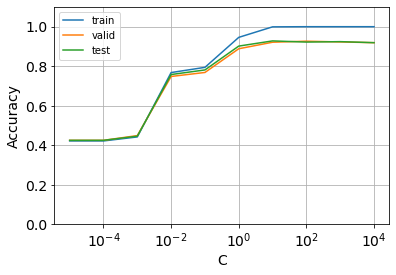

In [14]:
import matplotlib.pyplot as plt

def calc_scores(c):
    y_train = train_df['CATEGORY']
    y_valid = valid_df['CATEGORY']
    y_test = test_df['CATEGORY']
    
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_valid_pred = clf.predict(X_valid)
    y_test_pred = clf.predict(X_test)
    
    scores = []
    scores.append(accuracy_score(y_train, y_train_pred))
    scores.append(accuracy_score(y_valid, y_valid_pred))
    scores.append(accuracy_score(y_test, y_test_pred))
    
    return scores


C = np.logspace(-5, 4, 10, base=10)
scores = []
for c in C:
    scores.append(calc_scores(c))
    
scores = np.array(scores).T
labels = ['train', 'valid', 'test']

for score, label in zip(scores, labels):
    plt.plot(C, score, label=label)

plt.ylim(0, 1.1)
plt.xscale('log')
plt.xlabel('C', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tick_params(labelsize=14)
plt.grid(True)
plt.legend()

# 59. ハイパーパラメータの探索
*学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．*

- 学習アルゴリズム(solver)
    - newton-cg
    - lbfgs
    - liblinear
    - sag
    
- 学習パラメータ

In [15]:
import itertools

def calc_scores_2(C,solver,class_weight):
    y_train = train_df['CATEGORY']
    y_valid = valid_df['CATEGORY']
    y_test = test_df['CATEGORY']
    
    clf = LogisticRegression(C=C, solver=solver, class_weight=class_weight)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_valid_pred = clf.predict(X_valid)
    y_test_pred = clf.predict(X_test)
    
    scores = []
    scores.append(accuracy_score(y_train, y_train_pred))
    scores.append(accuracy_score(y_valid, y_valid_pred))
    scores.append(accuracy_score(y_test, y_test_pred))
    return scores

C = np.logspace(-5, 4, 10, base=10)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [None, 'balanced']
best_parameter = None
best_scores = None
max_valid_score = 0
for c, s, w in itertools.product(C, solver, class_weight):
    print(c, s, w)
    scores = calc_scores_2(c, s, w)
    #print (scores)
    if scores[1] > max_valid_score:
        max_valid_score = scores[1]
        best_parameter = [c, s, w]
        best_scores = scores
print ('best patameter: ', best_parameter)
print ('best scores: ', best_scores)
print ('test accuracy: ', best_scores[2])

1e-05 newton-cg None
1e-05 newton-cg balanced
1e-05 lbfgs None
1e-05 lbfgs balanced
1e-05 liblinear None
1e-05 liblinear balanced
1e-05 sag None
1e-05 sag balanced
1e-05 saga None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


1e-05 saga balanced
0.0001 newton-cg None
0.0001 newton-cg balanced
0.0001 lbfgs None
0.0001 lbfgs balanced
0.0001 liblinear None
0.0001 liblinear balanced
0.0001 sag None
0.0001 sag balanced
0.0001 saga None
0.0001 saga balanced
0.001 newton-cg None
0.001 newton-cg balanced
0.001 lbfgs None
0.001 lbfgs balanced
0.001 liblinear None
0.001 liblinear balanced
0.001 sag None
0.001 sag balanced
0.001 saga None
0.001 saga balanced
0.01 newton-cg None
0.01 newton-cg balanced
0.01 lbfgs None
0.01 lbfgs balanced
0.01 liblinear None
0.01 liblinear balanced
0.01 sag None
0.01 sag balanced
0.01 saga None
0.01 saga balanced
0.1 newton-cg None
0.1 newton-cg balanced
0.1 lbfgs None
0.1 lbfgs balanced
0.1 liblinear None
0.1 liblinear balanced
0.1 sag None
0.1 sag balanced
0.1 saga None
0.1 saga balanced
1.0 newton-cg None
1.0 newton-cg balanced
1.0 lbfgs None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0 lbfgs balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0 liblinear None
1.0 liblinear balanced
1.0 sag None
1.0 sag balanced
1.0 saga None
1.0 saga balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


10.0 newton-cg None
10.0 newton-cg balanced
10.0 lbfgs None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10.0 lbfgs balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10.0 liblinear None
10.0 liblinear balanced
10.0 sag None
10.0 sag balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


10.0 saga None
10.0 saga balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


100.0 newton-cg None
100.0 newton-cg balanced
100.0 lbfgs None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.0 lbfgs balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.0 liblinear None
100.0 liblinear balanced
100.0 sag None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


100.0 sag balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


100.0 saga None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


100.0 saga balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


1000.0 newton-cg None
1000.0 newton-cg balanced
1000.0 lbfgs None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1000.0 lbfgs balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1000.0 liblinear None
1000.0 liblinear balanced
1000.0 sag None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


1000.0 sag balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


1000.0 saga None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


1000.0 saga balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


10000.0 newton-cg None
10000.0 newton-cg balanced
10000.0 lbfgs None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10000.0 lbfgs balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10000.0 liblinear None
10000.0 liblinear balanced
10000.0 sag None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


10000.0 sag balanced


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


10000.0 saga None


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


10000.0 saga balanced
best patameter:  [100.0, 'liblinear', 'balanced']
best scores:  [0.9990629685157422, 0.9325337331334332, 0.9250374812593704]
test accuracy:  0.9250374812593704


/Users/motekihina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
